### JDF - boundary condition analysis and transports

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
import netCDF4 as nc
import matplotlib
from matplotlib import pyplot as plt
from salishsea_tools import (
    viz_tools)
import cmocean as cm
import numpy as np
import seawater
import arrow
import xarray as xr
import pickle

import mpl_interactions.ipyplot as iplt
from mpl_interactions import indexer


## Visualize where transports are output in the model

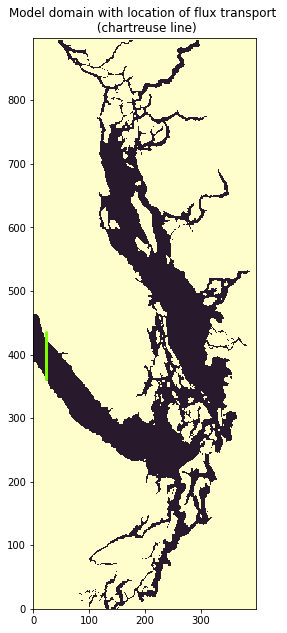

In [4]:
fact = 0.7
fig = plt.figure(figsize=(15*fact, 15*fact))
ax1 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1) 
bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = nc.Dataset(bath)
viz_tools.set_aspect(ax1)   
fmask = (grid['fmask'][0,0,:,:])    
mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)
# for i in range(370,480):
#     pts = ax1.scatter(5,i,s=3,c='red', marker='o')
    
for i in range(361,(361+75)):
    pts = ax1.scatter(23,i,s=3,c='chartreuse', marker='o')
    
w = plt.title('Model domain with location of flux transport \n (chartreuse line)')

In [5]:
# pickle.dump(anomsal_flux_stor_conc, open("./pkls_pyscripts/anomsal_flux_stor_conc.pkl", 'wb'))
# pickle.dump(anomDIC_2050_flux_stor_conc, open("./pkls_pyscripts/anomDIC_2050_flux_stor.pkl", 'wb'))

anomsal_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/anomsal_flux_stor_conc.pkl', 'rb'))  
anomDIC_2050_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/anomDIC_2050_flux_stor.pkl', 'rb'))  

![legend](legend.png)

NameError: name 'sal' is not defined

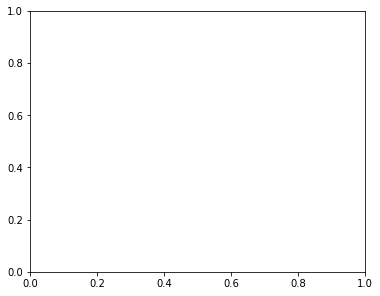

In [6]:
datY = anomDIC_2050_flux_stor_conc
datX = anomsal_flux_stor_conc


fig, ax = plt.subplots(figsize=(6, 4.8))
controls = iplt.scatter(
    sal,
    DIC,
    
    s=10,
    year=np.arange(2013, 2020),
    c=testcol,
    #edgecolors="k",
    slider_formats="{:d}",
    play_buttons=True,
    play_button_pos="left",
)

# for m in range(0,12):
#     iplt.scatter(indexer(datX[:, 0, m]), indexer(datY[:, 0, m]),\
#                  color = 'k', label=f'month: {m+1}', controls=ctrls)

    
fs = 15
plt.grid()
#ax.set_xscale("log")
ax.axhline(y=0); ax.axvline(x=0) 
ax.set_xlim([-20000, 20000])
ax.set_ylim([-1500,1500])
ax.set_xlabel("Salinity anomaly (kg m$^{-2}$ d$^{-1}$)", fontsize=12)
_ = ax.set_ylabel("DIC anomaly (mol m$^{-2}$ d$^{-1}$)", fontsize=12)

In [ ]:


fig, ax = plt.subplots()

# plot the first month in order to generate the controls
ctrls = iplt.plot(
    indexer(datX[:, :, 0], "year"),
    indexer(datY[:, :, 0], "year"),
    "o",
    label=f"month: {0}",
    year=np.arange(7),
)
for m in range(1, 12):
    iplt.plot(
        indexer(datX[:, :, m], "year"),
        indexer(datY[:, :, m], "year"),
        "o",
        label=f"month: {m}",
        controls=ctrls,
    )
plt.legend(loc=1)

In [ ]:
datY = anomDIC_2050_flux_stor_conc
datX = anomsal_flux_stor_conc

fig, ax = plt.subplots()
year = 0

def indexer(arr, axis=0):
    def f(*args, **kwargs):
        if 'year' in kwargs:
            return np.take(arr, kwargs['year'], axis=axis)
        raise ValueError(f"indexer did not receive a kwarg with a name in {idxs}")
    return f

ctrls = iplt.scatter(indexer(datX[:, 0, :]), indexer(datY[:, 0, :]), label=f'month: {m}', year=np.arange(7))

for m in range(1,12):
    iplt.scatter(indexer(datX[:, m, :]), indexer(datY[:, m, :]), label=f'month: {m}', controls=ctrls)
plt.legend()

In [ ]:
import pandas as pd
from matplotlib.colors import to_rgba_array, TABLEAU_COLORS, XKCD_COLORS

data = pd.read_json('nations.json')
def clean_data(data):
    for column in ['income', 'lifeExpectancy', 'population']:
        data = data.drop(data[data[column].apply(len) <= 4].index)
    return data

def extrap_interp(data):
    data = np.array(data)
    x_range = np.arange(1800, 2009, 1.)
    y_range = np.interp(x_range, data[:, 0], data[:, 1])
    return y_range

def extrap_data(data):
    for column in ['income', 'lifeExpectancy', 'population']:
        data[column] = data[column].apply(extrap_interp)
    return data
data = clean_data(data)
data = extrap_data(data)
income_min, income_max = np.min(data['income'].apply(np.min)), np.max(data['income'].apply(np.max))
life_exp_min, life_exp_max = np.min(data['lifeExpectancy'].apply(np.min)), np.max(data['lifeExpectancy'].apply(np.max))
pop_min, pop_max = np.min(data['population'].apply(np.min)), np.max(data['population'].apply(np.max))

In [ ]:
def x(year):
    return data["income"].apply(lambda x: x[year - 1800])


def y(x, year):
    return data["lifeExpectancy"].apply(lambda x: x[year - 1800])


def s(x, y, year):
    pop = data["population"].apply(lambda x: x[year - 1800])
    return 6000 * pop.values / pop_max


regions = data["region"].unique().tolist()
c = data["region"].apply(lambda x: list(TABLEAU_COLORS)[regions.index(x)]).values

In [ ]:
print(y(x,1850))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4.8))
controls = iplt.scatter(
    x,
    y,
    s=s,
    year=np.arange(1800, 2009),
    c=c,
    edgecolors="k",
    slider_formats="{:d}",
    play_buttons=True,
    play_button_pos="left",
)
fs = 15
ax.set_xscale("log")
ax.set_ylim([0, 100])
ax.set_xlim([200, income_max * 1.05])
ax.set_xlabel("Income", fontsize=fs)
_ = ax.set_ylabel("Life Expectancy", fontsize=fs)

In [ ]:
np.shape(anomDIC_2050_flux_stor)

In [ ]:
print(np.max(sal(DIC,2014)))

In [ ]:
DIC(2014)